In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('./Data/sam.funny_cleaning.csv')

In [3]:
df = data_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               192 non-null    int64  
 1   post_id             192 non-null    int64  
 2   text                192 non-null    object 
 3   post_text           192 non-null    object 
 4   time                192 non-null    object 
 5   timestamp           192 non-null    int64  
 6   comments            192 non-null    int64  
 7   shares              192 non-null    int64  
 8   username            192 non-null    object 
 9   comments_full       192 non-null    object 
 10  reactors            192 non-null    object 
 11  reactions           192 non-null    object 
 12  reaction_count      192 non-null    int64  
 13  thích               192 non-null    int64  
 14  yêu thích           192 non-null    int64  
 15  haha                192 non-null    int64  
 16  wow     

### Bài đăng có lượng reaction lớn nhất

In [4]:
post_max_reaction = df.loc[df['reaction_count'].idxmax()]
post_max_reaction

index                                                                72
post_id                                                 665207308976150
text                  Tỉnh 3 ngày chưa xỉu.\n\n#Tanjiro #Inosuke #Ze...
post_text             Tỉnh 3 ngày chưa xỉu.\n\n#Tanjiro #Inosuke #Ze...
time                                                2023-08-01 21:16:26
timestamp                                                    1690899386
comments                                                           3658
shares                                                             1137
username                                                   Gia đình Ngộ
comments_full         [{'comment_id': '692275942716576', 'comment_ur...
reactors              [{'name': 'Uyên Thảo Vũ', 'link': 'https://fac...
reactions             {'thích': 23339, 'yêu thích': 349, 'haha': 792...
reaction_count                                                   104862
thích                                                           

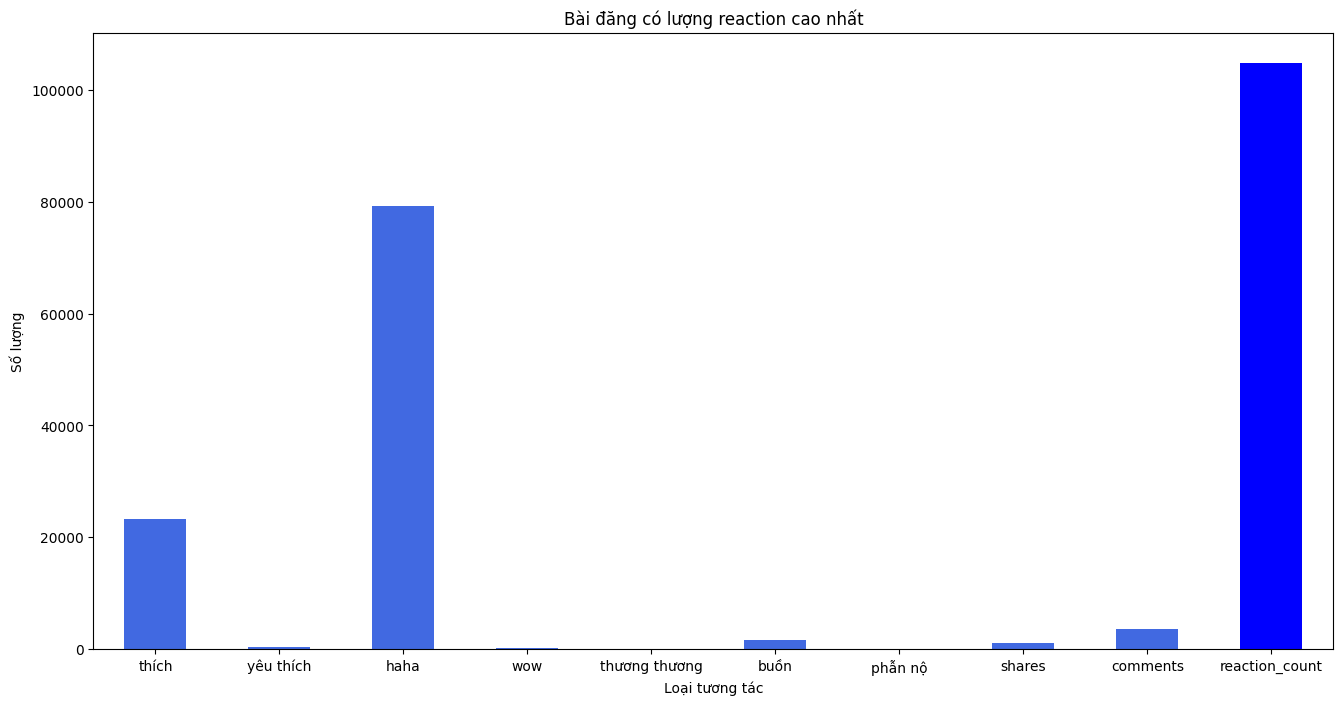

In [5]:
a = post_max_reaction[['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ', 'shares', 'comments', 'reaction_count']]
colors = ['royalblue'] * 10
colors[-1] = "blue"
a.plot(kind='bar', figsize=(16, 8), color = colors)
plt.xticks(rotation = 0)
plt.xlabel("Loại tương tác")
plt.ylabel("Số lượng")
plt.title("Bài đăng có lượng reaction cao nhất")
plt.show()

### Bài đăng có lượng share lớn nhất

In [6]:
post_max_shares = df.loc[df['reaction_count'].idxmax()]
post_max_shares

index                                                                72
post_id                                                 665207308976150
text                  Tỉnh 3 ngày chưa xỉu.\n\n#Tanjiro #Inosuke #Ze...
post_text             Tỉnh 3 ngày chưa xỉu.\n\n#Tanjiro #Inosuke #Ze...
time                                                2023-08-01 21:16:26
timestamp                                                    1690899386
comments                                                           3658
shares                                                             1137
username                                                   Gia đình Ngộ
comments_full         [{'comment_id': '692275942716576', 'comment_ur...
reactors              [{'name': 'Uyên Thảo Vũ', 'link': 'https://fac...
reactions             {'thích': 23339, 'yêu thích': 349, 'haha': 792...
reaction_count                                                   104862
thích                                                           

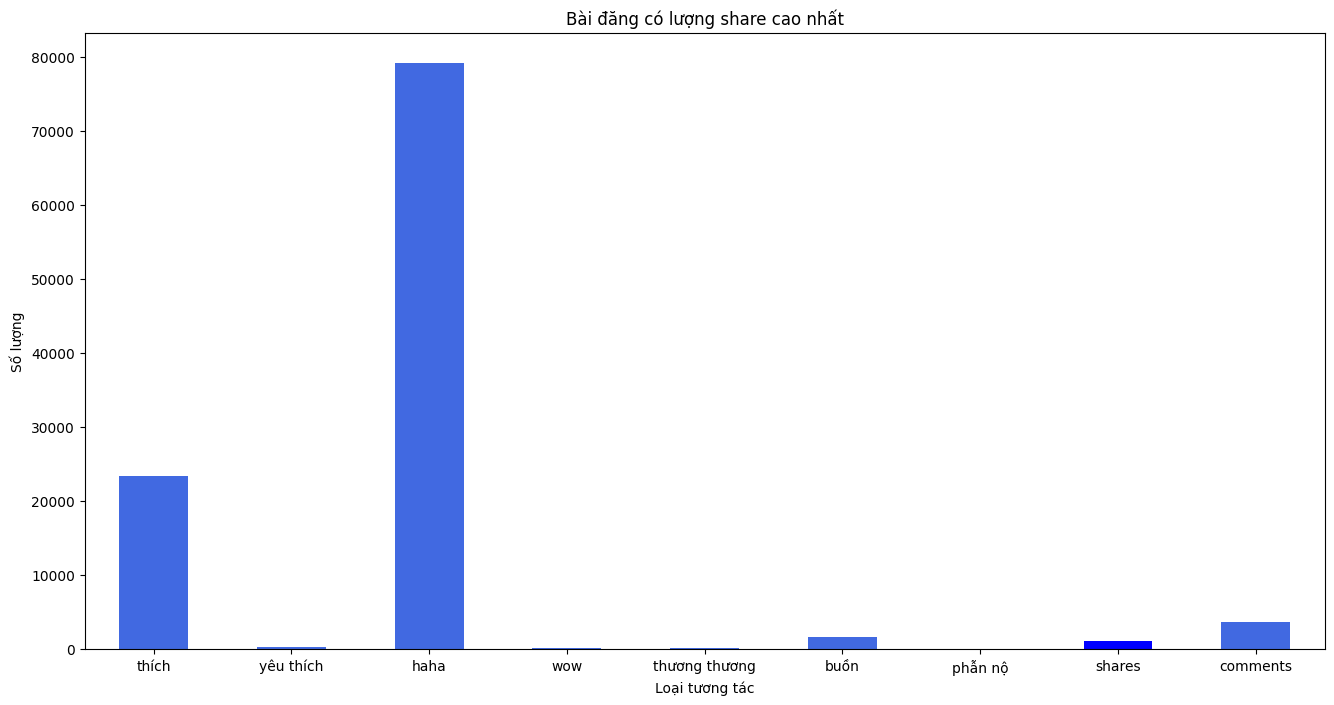

In [7]:
a = post_max_reaction[['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ', 'shares', 'comments']]
colors = ['royalblue'] * 9
colors[-2] = 'blue'
ax = a.plot(kind='bar', figsize=(16, 8), color = colors)
plt.xticks(rotation = 0)
plt.xlabel("Loại tương tác")
plt.ylabel("Số lượng")
plt.title("Bài đăng có lượng share cao nhất")
plt.show()

### Bài đăng có lượt comment lớn nhất

In [8]:
post_max_shares = df.loc[df['reaction_count'].idxmax()]
post_max_shares

index                                                                72
post_id                                                 665207308976150
text                  Tỉnh 3 ngày chưa xỉu.\n\n#Tanjiro #Inosuke #Ze...
post_text             Tỉnh 3 ngày chưa xỉu.\n\n#Tanjiro #Inosuke #Ze...
time                                                2023-08-01 21:16:26
timestamp                                                    1690899386
comments                                                           3658
shares                                                             1137
username                                                   Gia đình Ngộ
comments_full         [{'comment_id': '692275942716576', 'comment_ur...
reactors              [{'name': 'Uyên Thảo Vũ', 'link': 'https://fac...
reactions             {'thích': 23339, 'yêu thích': 349, 'haha': 792...
reaction_count                                                   104862
thích                                                           

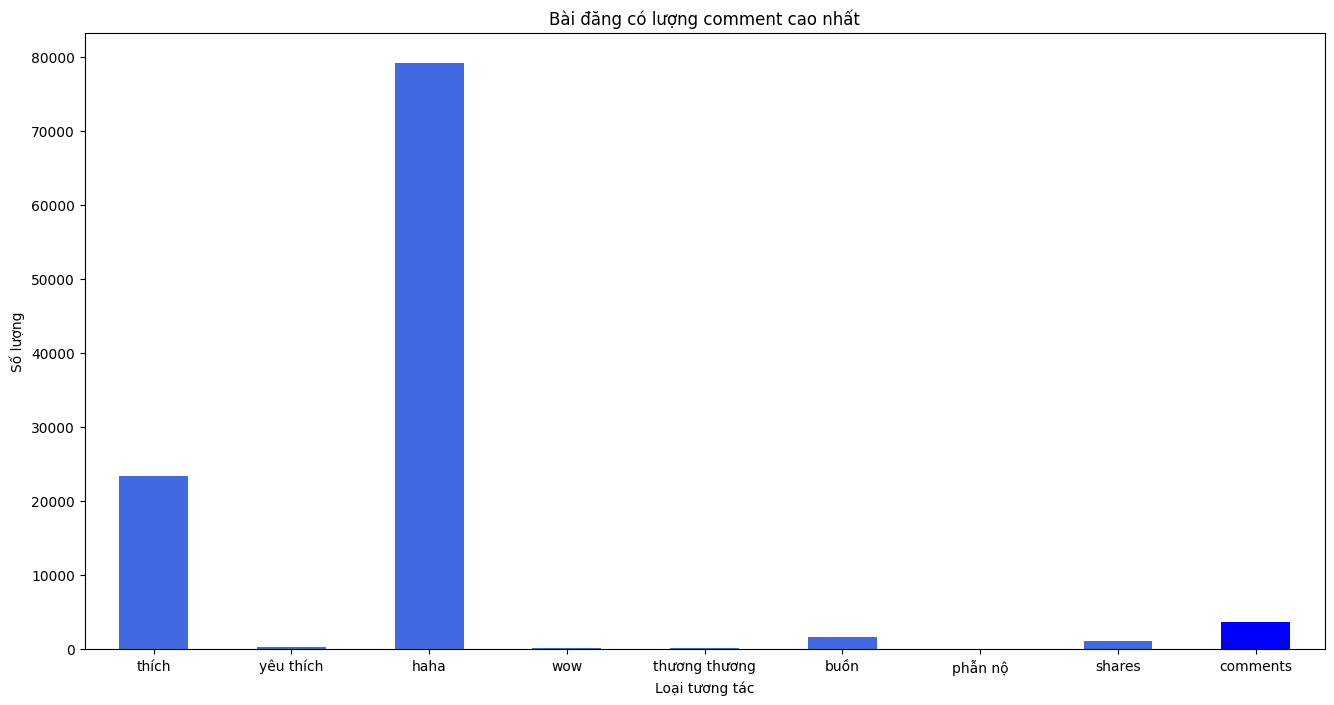

In [9]:
a = post_max_reaction[['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ', 'shares', 'comments']]
colors = ['royalblue'] * 9
colors[-1] = 'blue'
ax = a.plot(kind='bar', figsize=(16, 8), color = colors)
plt.xticks(rotation = 0)
plt.xlabel("Loại tương tác")
plt.ylabel("Số lượng")
plt.title("Bài đăng có lượng comment cao nhất")
plt.show()

### Số bài đăng trong từng giờ

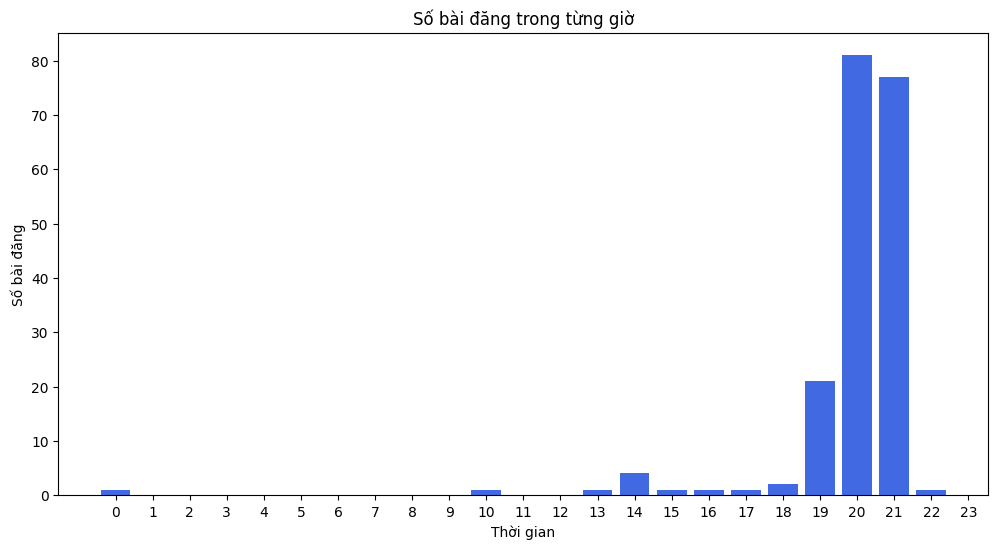

In [10]:
a = df["hour"].value_counts().sort_index()
plt.subplots(figsize=(12, 6))
plt.bar(a.index, a.values,color = 'royalblue')
plt.xticks(list(range(24)))
plt.title("Số bài đăng trong từng giờ")
plt.xlabel("Thời gian")
plt.ylabel("Số bài đăng")
plt.show()

In [11]:
reactions = df[['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ', 'shares', 'comments', 'hour', 'reaction_count']]

Text(0.5, 1.0, 'Tổng số lượng của từng loại tương tác')

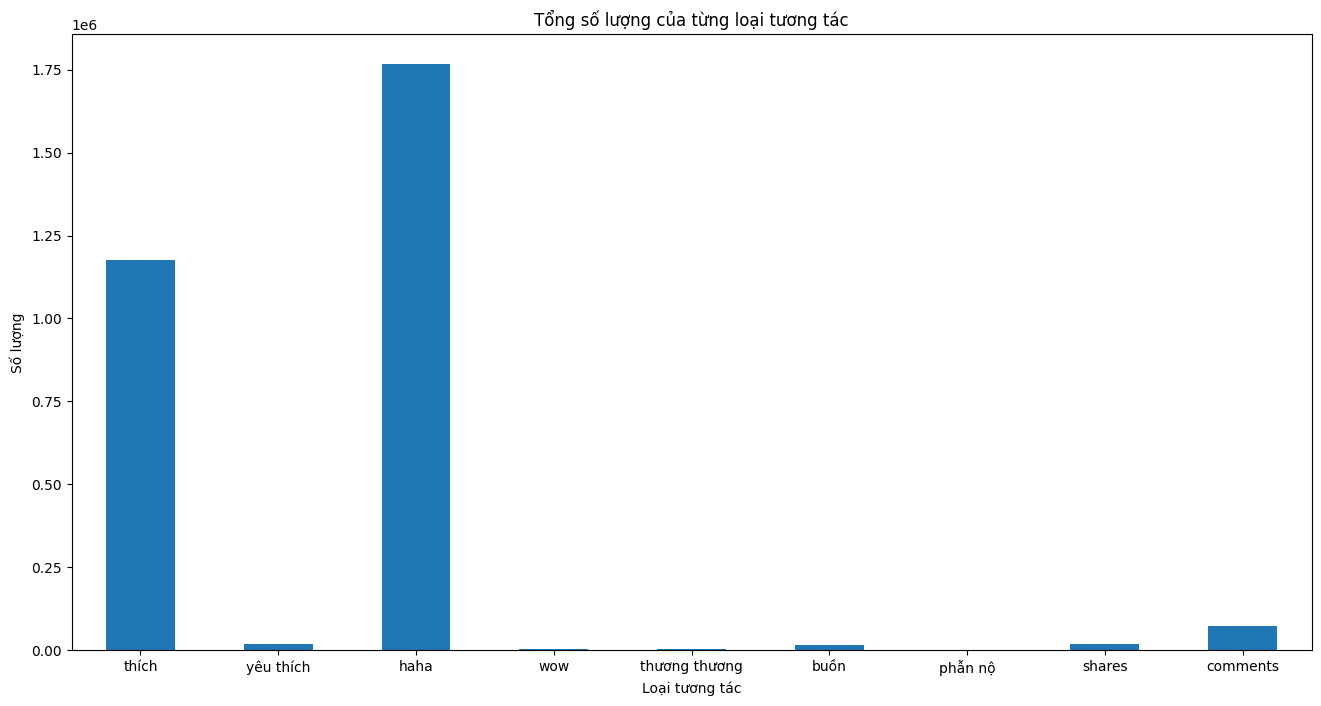

In [12]:
a = reactions[['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ', 'shares', 'comments']].sum()
a.plot(kind='bar', figsize=(16, 8))
plt.xticks(rotation = 0)
plt.xlabel('Loại tương tác')
plt.ylabel('Số lượng')
plt.title('Tổng số lượng của từng loại tương tác')

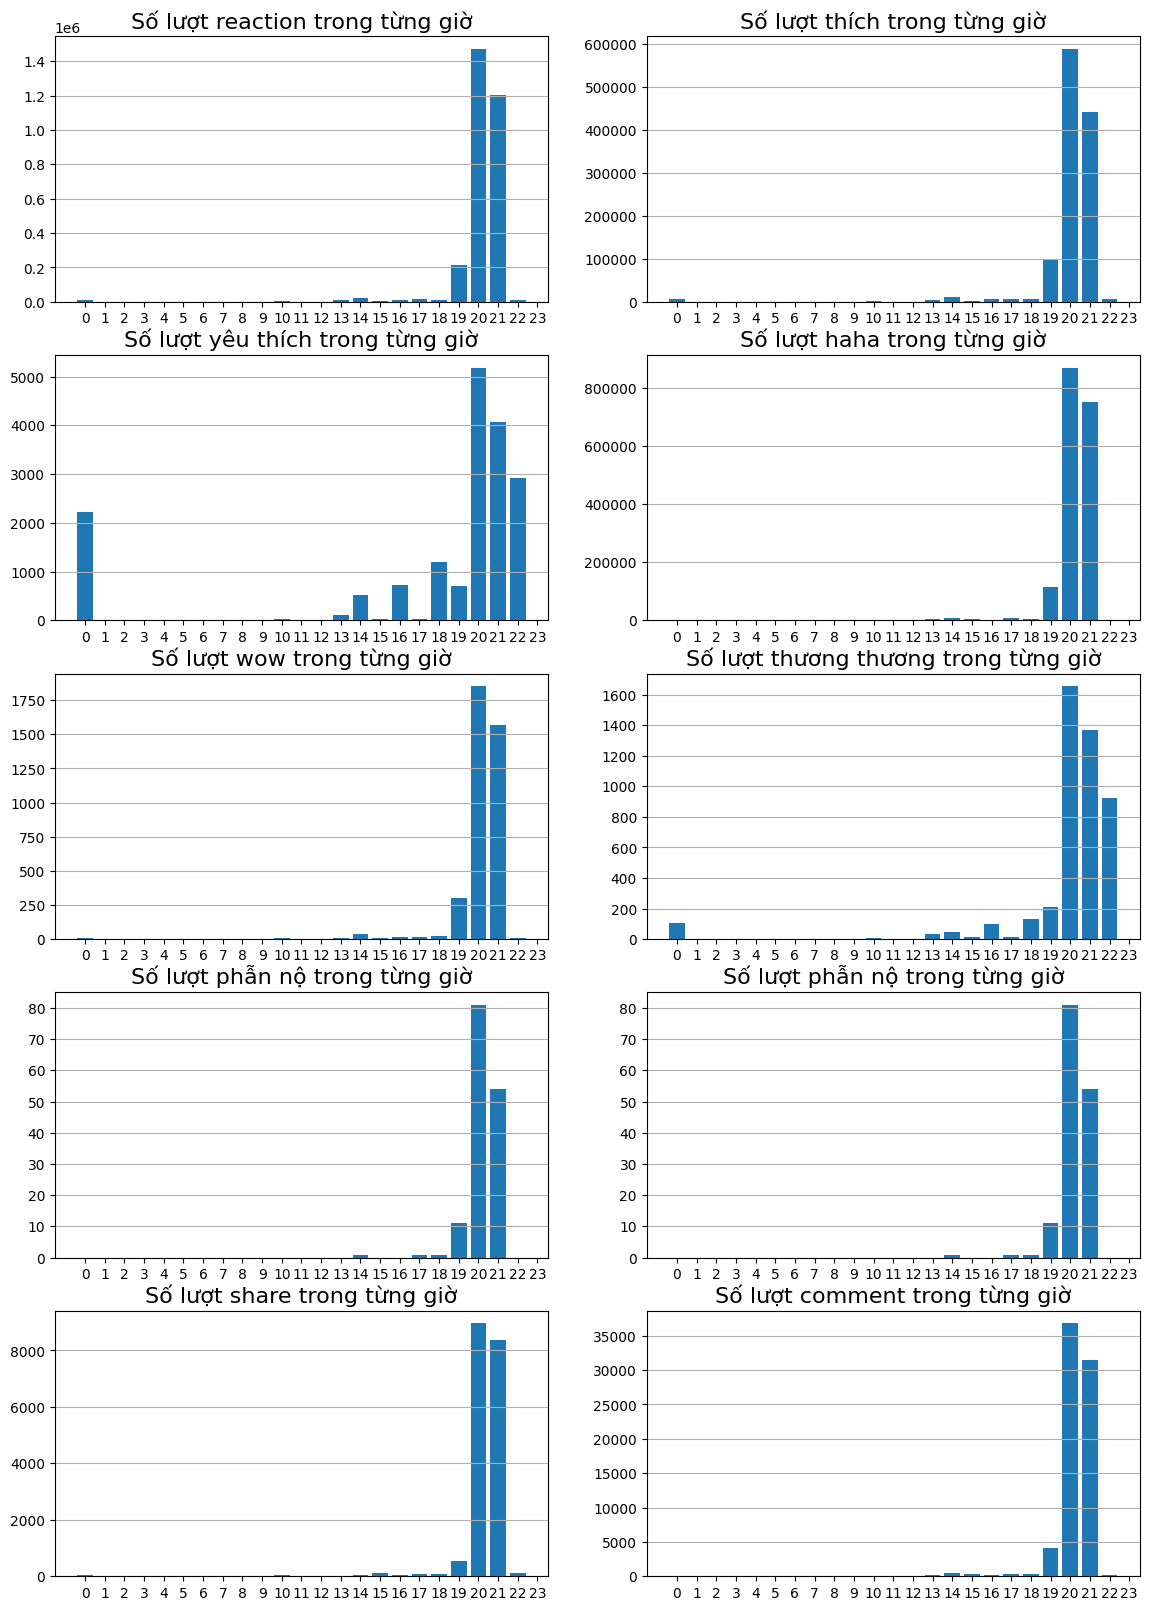

In [13]:
plt.figure(figsize=(14, 20))

ax1 = plt.subplot2grid((5, 2), (0, 0))
a = df.groupby('hour')['reaction_count'].sum().reset_index()
ax1.bar(a['hour'], a['reaction_count'])
ax1.set_title("Số lượt reaction trong từng giờ", fontdict={'size': 16})
ax1.set_xticks(list(range(24)))
ax1.grid(axis='y')

ax2 = plt.subplot2grid((5, 2), (0, 1))
a = df.groupby('hour')['thích'].sum().reset_index()
ax2.bar(a['hour'], a['thích'])
ax2.set_title("Số lượt thích trong từng giờ", fontdict={'size': 16})
ax2.set_xticks(list(range(24)))
ax2.grid(axis='y')

ax3 = plt.subplot2grid((5, 2), (1, 0))
a = df.groupby('hour')['yêu thích'].sum().reset_index()
ax3.bar(a['hour'], a['yêu thích'])
ax3.set_title("Số lượt yêu thích trong từng giờ", fontdict={'size': 16})
ax3.set_xticks(list(range(24)))
ax3.grid(axis='y')

ax4 = plt.subplot2grid((5, 2), (1,1))
a = df.groupby('hour')['haha'].sum().reset_index()
ax4.bar(a['hour'], a['haha'])
ax4.set_title("Số lượt haha trong từng giờ", fontdict={'size': 16})
ax4.set_xticks(list(range(24)))
ax4.grid(axis='y')

ax5 = plt.subplot2grid((5, 2), (2, 0))
a = df.groupby('hour')['wow'].sum().reset_index()
ax5.bar(a['hour'], a['wow'])
ax5.set_title("Số lượt wow trong từng giờ", fontdict={'size': 16})
ax5.set_xticks(list(range(24)))
ax5.grid(axis='y')

ax6 = plt.subplot2grid((5, 2), (2, 1))
a = df.groupby('hour')['thương thương'].sum().reset_index()
ax6.bar(a['hour'], a['thương thương'])
ax6.set_title("Số lượt thương thương trong từng giờ", fontdict={'size': 16})
ax6.set_xticks(list(range(24)))
ax6.grid(axis='y')

ax7 = plt.subplot2grid((5, 2), (3,0))
a = df.groupby('hour')['phẫn nộ'].sum().reset_index()
ax7.bar(a['hour'], a['phẫn nộ'])
ax7.set_title("Số lượt phẫn nộ trong từng giờ", fontdict={'size': 16})
ax7.set_xticks(list(range(24)))
ax7.grid(axis='y')

ax8 = plt.subplot2grid((5, 2), (3, 1))
a = df.groupby('hour')['phẫn nộ'].sum().reset_index()
ax8.bar(a['hour'], a['phẫn nộ'])
ax8.set_title("Số lượt phẫn nộ trong từng giờ", fontdict={'size': 16})
ax8.set_xticks(list(range(24)))
ax8.grid(axis='y')

ax9 = plt.subplot2grid((5, 2), (4, 0))
a = df.groupby('hour')['shares'].sum().reset_index()
ax9.bar(a['hour'], a['shares'])
ax9.set_title("Số lượt share trong từng giờ", fontdict={'size': 16})
ax9.set_xticks(list(range(24)))
ax9.grid(axis='y')

ax10 = plt.subplot2grid((5, 2), (4, 1))
a = df.groupby('hour')['comments'].sum().reset_index()
ax10.bar(a['hour'], a['comments'])
ax10.set_title("Số lượt comment trong từng giờ", fontdict={'size': 16})
ax10.set_xticks(list(range(24)))
ax10.grid(axis='y')

In [14]:
day_of_week_number = {
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 4,
    'Thursday': 5,
    'Friday': 6,
    'Saturday': 7,
    'Sunday': 8
}

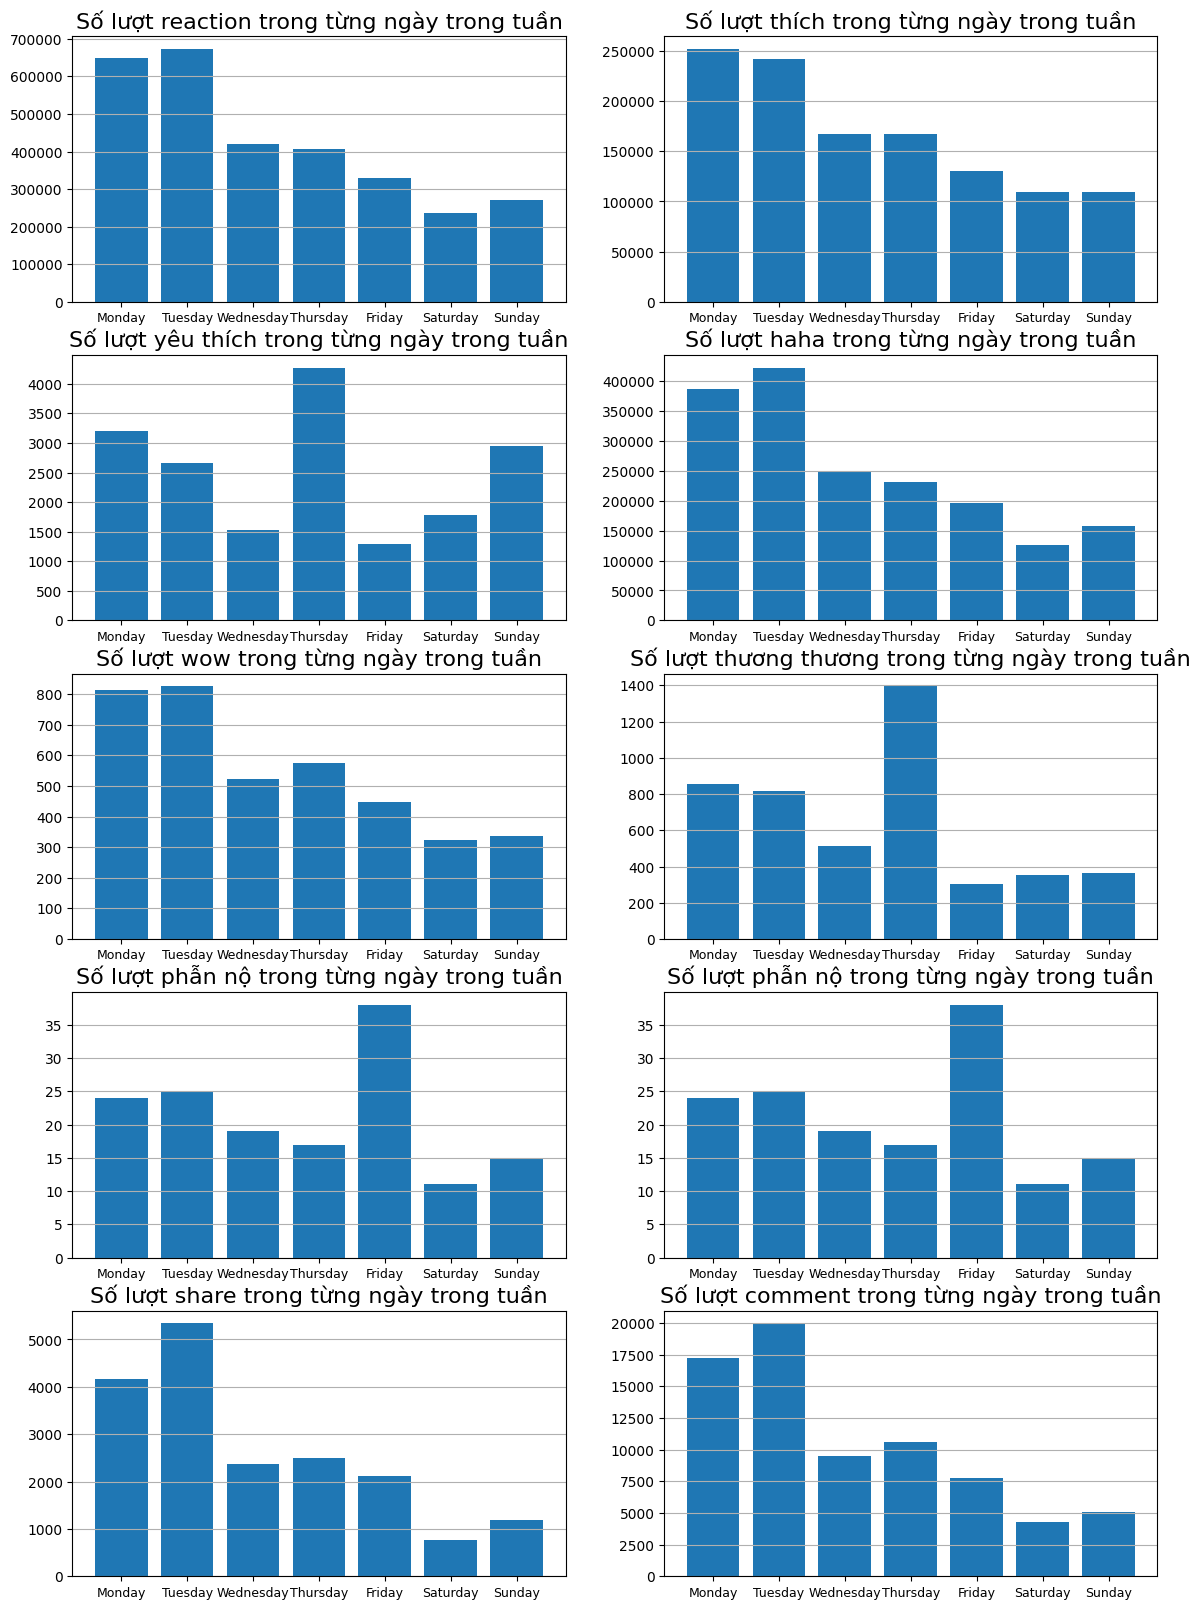

In [15]:
plt.figure(figsize=(14, 20))

ax1 = plt.subplot2grid((5, 2), (0, 0))
a = df.groupby('day_of_week')['reaction_count'].sum().reset_index()
a['day_of_week_number'] = a['day_of_week'].map(day_of_week_number)
a = a.sort_values(by='day_of_week_number', ascending=True)
ax1.bar(a['day_of_week'], a['reaction_count'])
ax1.set_title("Số lượt reaction trong từng ngày trong tuần", fontdict={'size': 16})
ax1.tick_params(axis='x', labelsize=9)
ax1.grid(axis='y')

ax2 = plt.subplot2grid((5, 2), (0, 1))
a = df.groupby('day_of_week')['thích'].sum().reset_index()
a['day_of_week_number'] = a['day_of_week'].map(day_of_week_number)
a = a.sort_values(by='day_of_week_number', ascending=True)
ax2.bar(a['day_of_week'], a['thích'])
ax2.set_title("Số lượt thích trong từng ngày trong tuần", fontdict={'size': 16})
ax2.tick_params(axis='x', labelsize=9)
ax2.grid(axis='y')

ax3 = plt.subplot2grid((5, 2), (1, 0))
a = df.groupby('day_of_week')['yêu thích'].sum().reset_index()
a['day_of_week_number'] = a['day_of_week'].map(day_of_week_number)
a = a.sort_values(by='day_of_week_number', ascending=True)
ax3.bar(a['day_of_week'], a['yêu thích'])
ax3.set_title("Số lượt yêu thích trong từng ngày trong tuần", fontdict={'size': 16})
ax3.tick_params(axis='x', labelsize=9)
ax3.grid(axis='y')

ax4 = plt.subplot2grid((5, 2), (1,1))
a = df.groupby('day_of_week')['haha'].sum().reset_index()
a['day_of_week_number'] = a['day_of_week'].map(day_of_week_number)
a = a.sort_values(by='day_of_week_number', ascending=True)
ax4.bar(a['day_of_week'], a['haha'])
ax4.set_title("Số lượt haha trong từng ngày trong tuần", fontdict={'size': 16})
ax4.tick_params(axis='x', labelsize=9)
ax4.grid(axis='y')

ax5 = plt.subplot2grid((5, 2), (2, 0))
a = df.groupby('day_of_week')['wow'].sum().reset_index()
a['day_of_week_number'] = a['day_of_week'].map(day_of_week_number)
a = a.sort_values(by='day_of_week_number', ascending=True)
ax5.bar(a['day_of_week'], a['wow'])
ax5.set_title("Số lượt wow trong từng ngày trong tuần", fontdict={'size': 16})
ax5.tick_params(axis='x', labelsize=9)
ax5.grid(axis='y')

ax6 = plt.subplot2grid((5, 2), (2, 1))
a = df.groupby('day_of_week')['thương thương'].sum().reset_index()
a['day_of_week_number'] = a['day_of_week'].map(day_of_week_number)
a = a.sort_values(by='day_of_week_number', ascending=True)
ax6.bar(a['day_of_week'], a['thương thương'])
ax6.set_title("Số lượt thương thương trong từng ngày trong tuần", fontdict={'size': 16})
ax6.tick_params(axis='x', labelsize=9)
ax6.grid(axis='y')

ax7 = plt.subplot2grid((5, 2), (3,0))
a = df.groupby('day_of_week')['phẫn nộ'].sum().reset_index()
a['day_of_week_number'] = a['day_of_week'].map(day_of_week_number)
a = a.sort_values(by='day_of_week_number', ascending=True)
ax7.bar(a['day_of_week'], a['phẫn nộ'])
ax7.set_title("Số lượt phẫn nộ trong từng ngày trong tuần", fontdict={'size': 16})
ax7.tick_params(axis='x', labelsize=9)
ax7.grid(axis='y')

ax8 = plt.subplot2grid((5, 2), (3, 1))
a = df.groupby('day_of_week')['phẫn nộ'].sum().reset_index()
a['day_of_week_number'] = a['day_of_week'].map(day_of_week_number)
a = a.sort_values(by='day_of_week_number', ascending=True)
ax8.bar(a['day_of_week'], a['phẫn nộ'])
ax8.set_title("Số lượt phẫn nộ trong từng ngày trong tuần", fontdict={'size': 16})
ax8.tick_params(axis='x', labelsize=9)
ax8.grid(axis='y')

ax9 = plt.subplot2grid((5, 2), (4, 0))
a = df.groupby('day_of_week')['shares'].sum().reset_index()
a['day_of_week_number'] = a['day_of_week'].map(day_of_week_number)
a = a.sort_values(by='day_of_week_number', ascending=True)
ax9.bar(a['day_of_week'], a['shares'])
ax9.set_title("Số lượt share trong từng ngày trong tuần", fontdict={'size': 16})
ax9.tick_params(axis='x', labelsize=9)
ax9.grid(axis='y')

ax10 = plt.subplot2grid((5, 2), (4, 1))
a = df.groupby('day_of_week')['comments'].sum().reset_index()
a['day_of_week_number'] = a['day_of_week'].map(day_of_week_number)
a = a.sort_values(by='day_of_week_number', ascending=True)
ax10.bar(a['day_of_week'], a['comments'])
ax10.set_title("Số lượt comment trong từng ngày trong tuần", fontdict={'size': 16})
ax10.tick_params(axis='x', labelsize=9)
ax10.grid(axis='y')

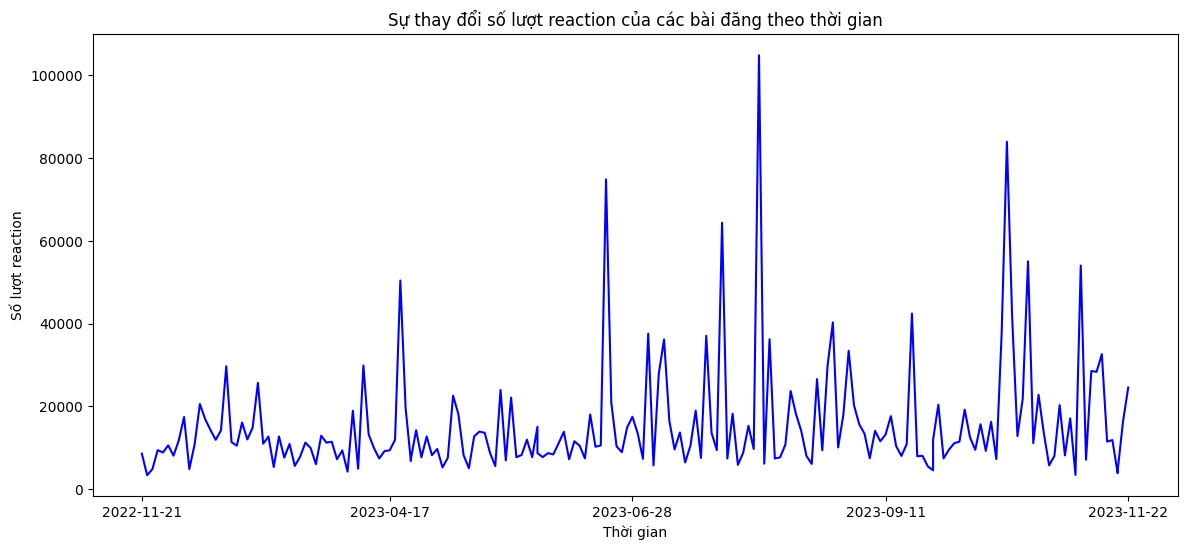

In [16]:
selected_ticks = [df['d-m-y'].iloc[0], df['d-m-y'].iloc[48], df['d-m-y'].iloc[96], df['d-m-y'].iloc[144], df['d-m-y'].iloc[-1]]
x = df['d-m-y'].to_list()
x.reverse()
y = df['reaction_count'].to_list()
y.reverse()
plt.subplots(figsize=(14, 6))
plt.plot(x, y, color = 'blue')
plt.xticks(selected_ticks)
plt.title("Sự thay đổi số lượt reaction của các bài đăng theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Số lượt reaction")
plt.show()

In [17]:
d = reactions.sum()
(d['thích'] + d['haha']) / (d['reaction_count'] + d['shares'] + d['comments']) * 100

95.58588542552322

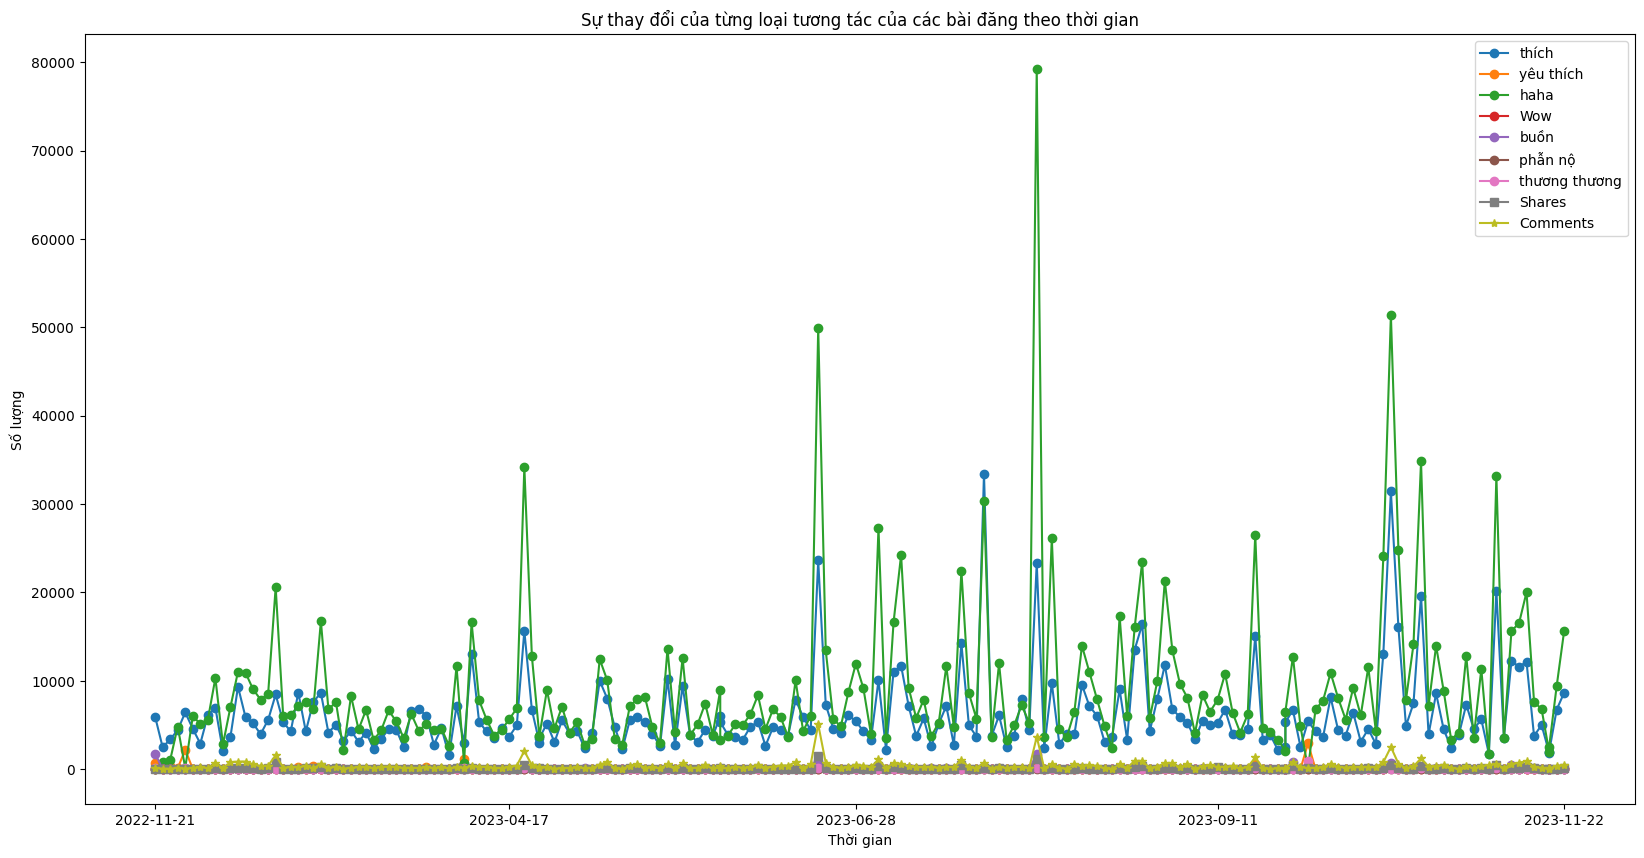

In [20]:
x = df['d-m-y'].to_list()
x.reverse()
y1 = reactions['thích'].to_list(); y1.reverse()
y2 = reactions['yêu thích'].to_list(); y2.reverse()
y3 = reactions['haha'].to_list(); y3.reverse()
y4 = reactions['wow'].to_list(); y4.reverse()
y5 = reactions['buồn'].to_list(); y5.reverse()
y6 = reactions['phẫn nộ'].to_list(); y6.reverse()
y7 = reactions['thương thương'].to_list(); y7.reverse()
y8 = reactions['shares'].to_list(); y8.reverse()
y9 = reactions['comments'].to_list(); y9.reverse()
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y1, label = "thích", marker="o")
ax.plot(x, y2, label = "yêu thích", marker="o")
ax.plot(x, y3, label = "haha", marker="o")
ax.plot(x, y4, label = "Wow", marker="o")
ax.plot(x, y5, label = "buồn", marker="o")
ax.plot(x, y6, label = "phẫn nộ", marker="o")
ax.plot(x, y7, label = "thương thương", marker="o")
ax.plot(x, y8, label = "Shares", marker="s")
ax.plot(x, y9, label = "Comments", marker="*")
ax.set_xticks(selected_ticks)
plt.title("Sự thay đổi của từng loại tương tác của các bài đăng theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Số lượng")
plt.legend()

### Độ tương quan giữa các loại cảm xúc với comment

In [19]:
print(reactions[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']].corrwith(reactions['comments']))

thích            0.721749
yêu thích        0.068288
haha             0.859682
wow              0.782405
buồn             0.618401
phẫn nộ          0.372218
thương thương    0.177080
dtype: float64
